# Knn binary citurs

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns

SEED = 42 # np.random.seed(SEED) - random 출력값 고정, jupyter에서는 한 sell에만 적용

## 데이터 불러오기

In [2]:
# !wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/citrus.csv

In [3]:
citrus = pd.read_csv('/content/citrus.csv')
citrus.shape

(10000, 6)

In [4]:
citrus.head(5)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [5]:
df = citrus.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


### 범주형 변수

In [7]:
df['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

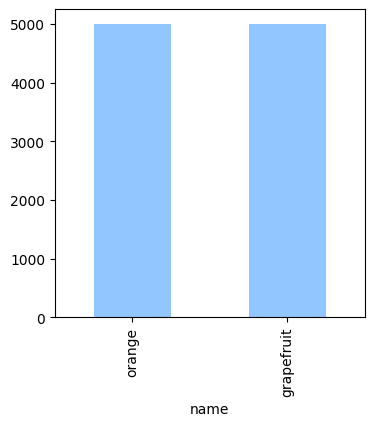

In [8]:
df['name'].value_counts().plot(kind='bar', figsize=(4,4))
plt.show()

### 연속형 변수

In [9]:
df_orange = df[df['name'] == 'orange']
df_grape = df[df['name'] == 'grapefruit']

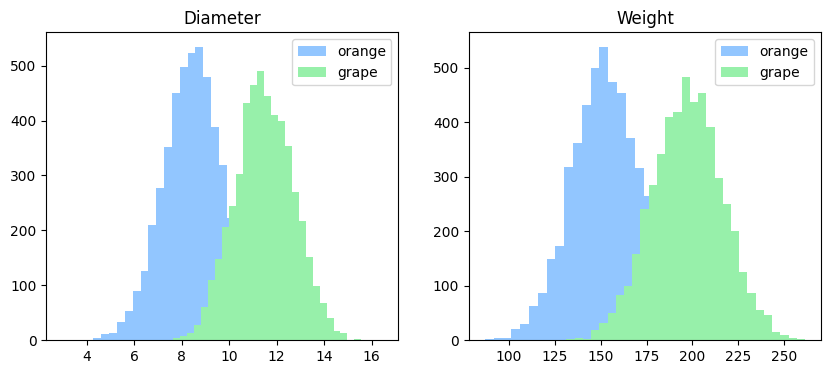

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].hist(df_orange['diameter'], bins=30, label='orange')
ax[0].hist(df_grape['diameter'], bins=30, label='grape')
ax[0].set_title('Diameter')
ax[0].legend()

ax[1].hist(df_orange['weight'], bins=30, label='orange')
ax[1].hist(df_grape['weight'], bins=30, label='grape')
ax[1].set_title('Weight')
ax[1].legend()

plt.show()

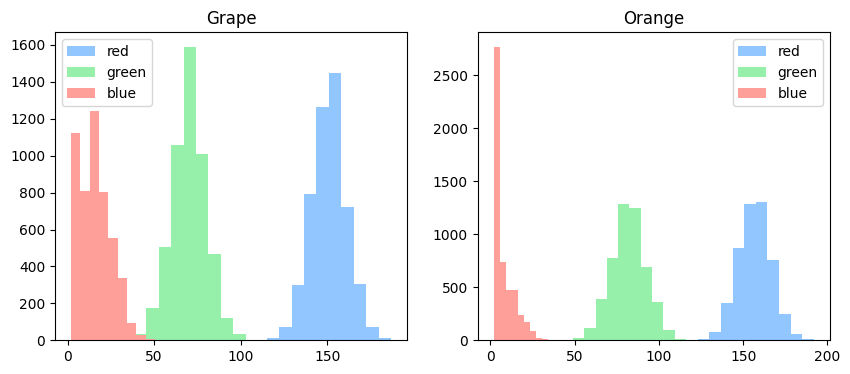

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].hist(df_grape['red'], label='red')
ax[0].hist(df_grape['green'], label='green')
ax[0].hist(df_grape['blue'], label='blue')
ax[0].set_title('Grape')
ax[0].legend()

ax[1].hist(df_orange['red'], label='red')
ax[1].hist(df_orange['green'], label='green')
ax[1].hist(df_orange['blue'], label='blue')
ax[1].set_title('Orange')
ax[1].legend()

plt.show()

In [12]:
df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

<Axes: >

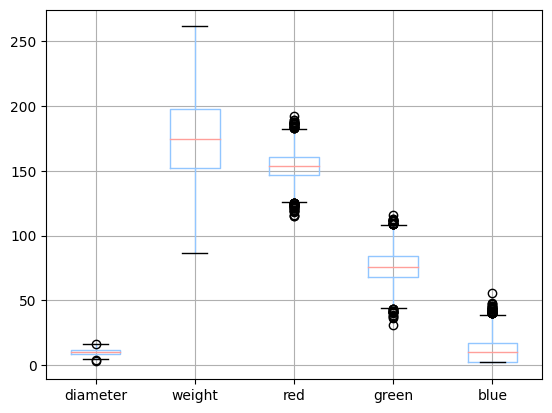

In [13]:
df[['name', 'diameter', 'weight', 'red', 'green', 'blue']].boxplot()

### 결측치 확인

In [14]:
df.isna().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

### 중복치 확인

In [15]:
df.duplicated().sum()

0

## 학습 데이터, 테스트 데이터 분리

In [16]:
df = df.sample(frac=1, random_state=SEED) # 데이터 섞기
df.head(5)

,name,diameter,weight,red,green,blue
6252,grapefruit,10.66,184.37,166,60,18
4684,orange,10.40,181.34,166,109,13
1731,orange,7.99,145.45,150,72,2
4742,orange,10.55,182.99,151,84,2
4521,orange,10.10,177.31,160,72,2


In [17]:
idx_train = int(len(df) * 0.6)
idx_val = int(len(df) * 0.8)

In [18]:
train = df.iloc[:idx_train,:]
val = df.iloc[idx_train:idx_val,:]
test = df.iloc[idx_val:,:]

train.shape, val.shape, test.shape

((6000, 6), (2000, 6), (2000, 6))

### X, y 변수 분리

In [19]:
X_train = train.drop(['name'], axis=1)
y_train = train['name']

X_val = val.drop(['name'], axis=1)
y_val = val['name']

In [20]:
print(y_train.value_counts())
print(y_val.value_counts())

name
orange        3062
grapefruit    2938
Name: count, dtype: int64
name
grapefruit    1042
orange         958
Name: count, dtype: int64


## 스케일링

In [21]:
X_train.head(5)

,diameter,weight,red,green,blue
6252,10.66,184.37,166,60,18
4684,10.40,181.34,166,109,13
1731,7.99,145.45,150,72,2
4742,10.55,182.99,151,84,2
4521,10.10,177.31,160,72,2


In [22]:
u = X_train.mean() # 평균
std = X_train.std() # 표준편차

In [23]:
X_train_s = (X_train - u) / std # 표준화
X_train_s.head(5)

,diameter,weight,red,green,blue
6252,0.372738,0.340350,1.138741,-1.366413,0.751860
4684,0.239331,0.236626,1.138741,2.790299,0.197186
1731,-0.997244,-0.991972,-0.390904,-0.348443,-1.023095
4742,0.316296,0.293110,-0.295301,0.669528,-1.023095
4521,0.085401,0.098670,0.565124,-0.348443,-1.023095


In [24]:
X_val_s = (X_val - u) / std # validation 표준화
X_val_s.head(5)

,diameter,weight,red,green,blue
2480,-0.756086,-0.751661,-0.390904,-0.009119,-0.801226
289,-1.756635,-1.753299,-0.104095,0.160542,-0.135618
6086,0.306034,0.266408,-1.538137,-1.536075,0.973729
3075,-0.561108,-0.558933,0.851932,2.281314,0.308121
8123,0.988460,1.001377,-0.773315,-1.366413,0.862794


In [25]:
ss_dic = {'mean':u, 'std':std}

## 인코딩
grapefruit : 0, orange : 1

In [26]:
label_dict = {'grapefruit':0, 'orange':1}

In [27]:
y_train_e = y_train.map(label_dict)
y_val_e = y_val.map(label_dict)

y_train_e.head(5), y_val_e.head(5)

(6252    0
 4684    1
 1731    1
 4742    1
 4521    1
 Name: name, dtype: int64,
 2480    1
 289     1
 6086    0
 3075    1
 8123    0
 Name: name, dtype: int64)

In [28]:
# numpy로 변경
X_train_s = X_train_s.to_numpy()
y_train_e = y_train_e.to_numpy()
X_val_s = X_val_s.to_numpy()
y_val_e = y_val_e.to_numpy()

In [29]:
print(X_train_s.shape, y_train_e.shape)
print(type(X_train_s), type(y_train_e))
print(X_val_s.shape, y_val_e.shape)
print(type(X_val_s), type(y_val_e))

(6000, 5) (6000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2000, 5) (2000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


## 모델 학습

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_s,y_train_e)

KNeighborsClassifier()

### 검증

In [32]:
y_pred = clf.predict(X_val_s) # 예측
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [33]:
(y_pred == y_val_e).sum() / len(y_val_e) # 정확도

0.9235

In [50]:
for k in range(3, 20): # k값 비교
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_s,y_train_e)
    y_pred = clf.predict(X_val_s)
    print(f'k = {k}, accuracy : {accuracy_score(y_val_e, y_pred)}')

k = 3, accuracy : 0.9175
k = 4, accuracy : 0.9145
k = 5, accuracy : 0.9235
k = 6, accuracy : 0.918
k = 7, accuracy : 0.9215
k = 8, accuracy : 0.9225
k = 9, accuracy : 0.9235
k = 10, accuracy : 0.925
k = 11, accuracy : 0.926
k = 12, accuracy : 0.9265
k = 13, accuracy : 0.9255
k = 14, accuracy : 0.9275
k = 15, accuracy : 0.927
k = 16, accuracy : 0.9265
k = 17, accuracy : 0.926
k = 18, accuracy : 0.9255
k = 19, accuracy : 0.926


## 테스트

In [34]:
test.shape

(2000, 6)

In [35]:
X_test = test.drop(['name'],axis=1)
y_test = test['name']

In [36]:
X_test_s = (X_test - u) / std
y_test_e = y_test.map(label_dict)

In [37]:
X_test_s.shape, y_test_e.shape

((2000, 5), (2000,))

In [38]:
X_test_s = X_test_s.to_numpy()
y_test_e = y_test_e.to_numpy()
print(type(X_test_s), type(y_test_e))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [39]:
y_pred = clf.predict(X_test_s)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [40]:
(y_pred == y_test_e).sum() / len(y_test_e)

0.917

### 평가 함수

In [42]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test_e,y_pred)
cfm

array([[938,  82],
       [ 84, 896]])

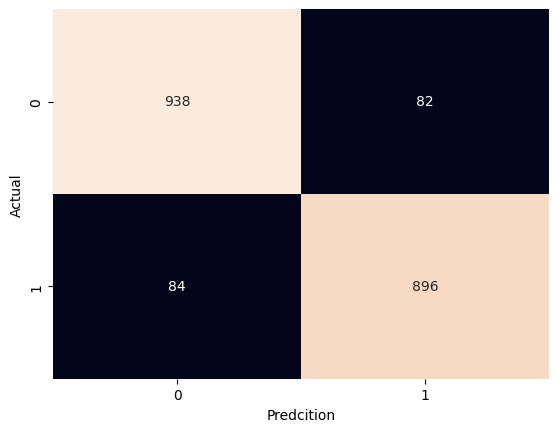

In [47]:
s = sns.heatmap(cfm, annot=True, fmt='d', cbar=False)
s.set(xlabel='Predcition', ylabel='Actual')
plt.show()

In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(f'accuracy : {accuracy_score(y_test_e, y_pred)}')
print(f'recall : {recall_score(y_test_e, y_pred)}')
print(f'precision : {precision_score(y_test_e, y_pred)}')
print(f'f1 : {f1_score(y_test_e, y_pred)}')

accuracy : 0.917
recall : 0.9142857142857143
precision : 0.9161554192229039
f1 : 0.9152196118488254
